In [15]:
from dotenv import load_dotenv
import wrds
import pandas as pd
import os
import numpy as np
import nasdaqdatalink as nsdk
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# This loads the variables from .env
load_dotenv()  
# Get your apis or usernames
nsdk_api = os.getenv('api_key_nasdaq')

In [3]:
# Get your apis or usernames
wrds_username = os.getenv('wrds_username')
# Connect to database 
db = wrds.Connection(wrds_username=wrds_username)
# Close the connection
db.close()

Loading library list...
Done


In [10]:
# Download the monthly US unemployment rate from years 2010-2019
df = (
    nsdk.get(dataset="FRED/UNRATENSA", 
                       start_date="2010-01-01", 
                       end_date="2019-12-31")
    .rename(columns={"Value": "unemp_rate"})
)
df.head()

,unemp_rate
Date,
2010-01-01,10.6
2010-02-01,10.4
2010-03-01,10.2
2010-04-01,9.5
2010-05-01,9.3


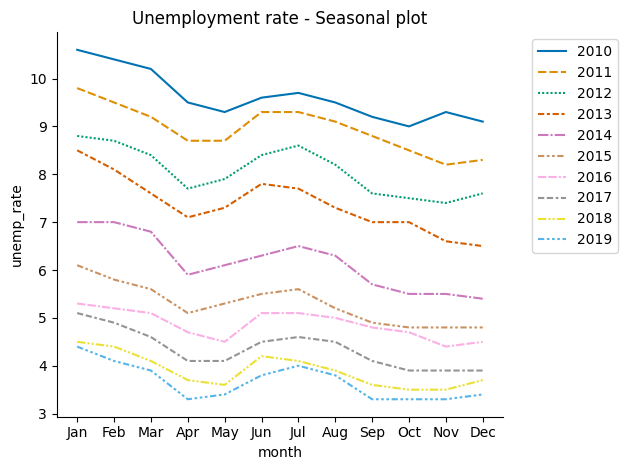

In [16]:
# a quick look at the plot
temp_df = df.copy()

temp_df["year"] = temp_df.index.year
temp_df["month"] = temp_df.index.strftime("%b")

sns.lineplot(data=temp_df, 
             x="month", 
             y="unemp_rate", 
             hue="year",
             style="year", 
             legend="full",
             palette="colorblind")

plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_6_2", dpi=200)

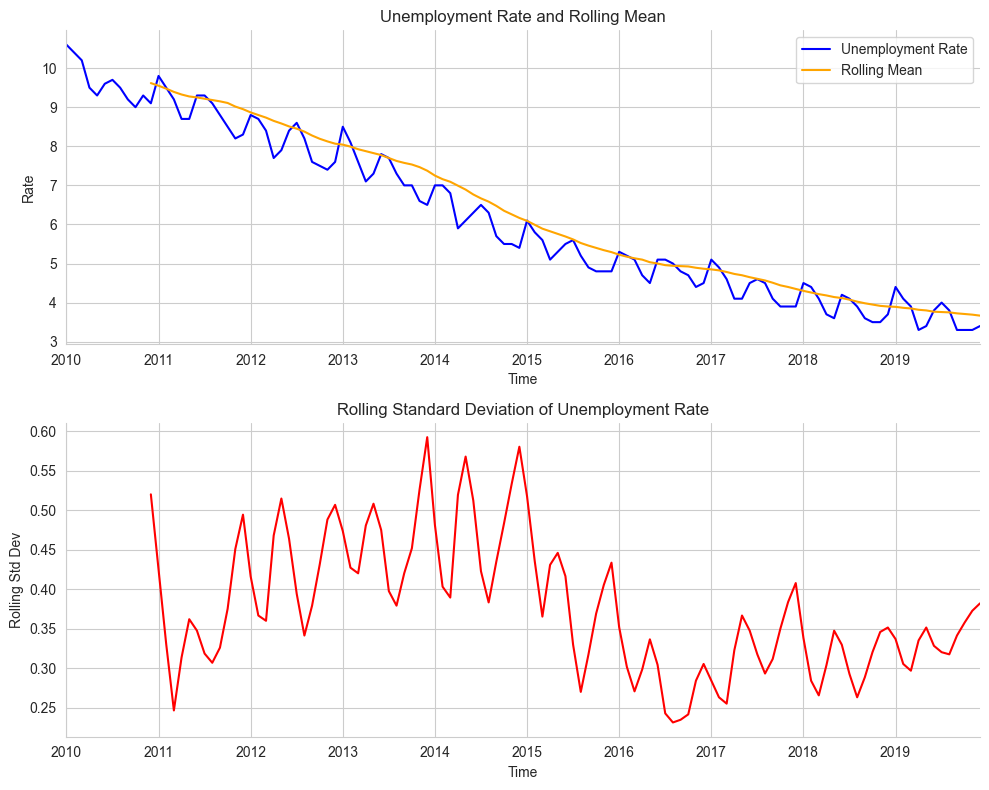

In [19]:
# Define the window size for rolling statistics
WINDOW_SIZE = 12 # To some it might be confusing that this means, I will put a description to those of you who are interested in knowing the mathematicla concept of how this is being calculated. 

# Calculate rolling mean and standard deviation
df["rolling_mean"] = df["unemp_rate"].rolling(window=WINDOW_SIZE).mean()
df["rolling_std"] = df["unemp_rate"].rolling(window=WINDOW_SIZE).std()

# Set plot style
sns.set_style("whitegrid")

# Create a subplot with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot unemployment rate and rolling mean on the first subplot
df['unemp_rate'].plot(ax=axes[0], color='blue', label='Unemployment Rate')
df['rolling_mean'].plot(ax=axes[0], color='orange', label='Rolling Mean')
axes[0].set_ylabel('Rate')
axes[0].set_xlabel('Time')
axes[0].set_title('Unemployment Rate and Rolling Mean')
axes[0].legend()  # Add a legend

# Plot rolling standard deviation on the second subplot
df['rolling_std'].plot(ax=axes[1], color='red', title='Rolling Standard Deviation of Unemployment Rate')
axes[1].set_ylabel('Rolling Std Dev')
axes[1].set_xlabel('Time')

# Improve plot layout and remove right and top spines
plt.tight_layout()
sns.despine()

# Display the plot
plt.show()


# Windows Size in the Algrothim (see comment above)
Window Size: The window size of 12 means that each point in the rolling mean is calculated as the average of the current and the previous 11 points. In other words, for each point in your time series, the rolling mean considers that point and the 11 preceding points.

First Point Calculation: For the very first point in the time series, there are not 11 previous points. Therefore, the rolling mean is not defined for the first 11 points if you're using a window size of 12. The rolling mean starts getting calculated from the 12th data point in the series.

Lags: The term "lags" often refers to a shifted version of the time series in time series analysis, where a lag of 1 means each point is shifted by one time period. In the context of a rolling mean, the window size determines how many previous points (including the current one) are used for the calculation, but it's not typically described as "lags."